# Laptop Price Prediction in R

### Introduction

This notebook performs data exploration on the laptop price dataset.

I performed data wrangling on this dataset in python previously, this is to demonstrate R techniques used

#### Imports

In [1]:
library(IRdisplay)

In [2]:
df <- read.csv("../input/laptop_price.csv")

#### Descriptive Statistics

In [3]:
head(df)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
6,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00


In [4]:
summary(df)

   laptop_ID        Company            Product            TypeName        
 Min.   :   1.0   Length:1303        Length:1303        Length:1303       
 1st Qu.: 331.5   Class :character   Class :character   Class :character  
 Median : 659.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 660.2                                                           
 3rd Qu.: 990.5                                                           
 Max.   :1320.0                                                           
     Inches      ScreenResolution       Cpu                Ram           
 Min.   :10.10   Length:1303        Length:1303        Length:1303       
 1st Qu.:14.00   Class :character   Class :character   Class :character  
 Median :15.60   Mode  :character   Mode  :character   Mode  :character  
 Mean   :15.02                                                           
 3rd Qu.:15.60                                                           
 Max.   :18.40                 

In [5]:
# data shape
dim(df)

[1] 1303   13

#### Null values

In [6]:
colSums(is.na(df))

laptop_ID          Company          Product         TypeName 
               0                0                0                0 
          Inches ScreenResolution              Cpu              Ram 
               0                0                0                0 
          Memory              Gpu            OpSys           Weight 
               0                0                0                0 
     Price_euros 
               0

#### Null values in a table

null_counts <- colSums(is.na(df))
display(data.frame(Null_Count = null_counts))

### Feature Exploration (some wrangling)

Features are explored in sequence.

In [7]:
names(df)

[1] "laptop_ID"        "Company"          "Product"          "TypeName"        
 [5] "Inches"           "ScreenResolution" "Cpu"              "Ram"             
 [9] "Memory"           "Gpu"              "OpSys"            "Weight"          
[13] "Price_euros"

#### Feature: Laptop_ID

Each entry is unique but some values are skipped.

In [8]:
length(unique(df$laptop_ID))

[1] 1303

In [9]:
tail(df$laptop_ID)

[1] 1315 1316 1317 1318 1319 1320

#### Dropping Laptop_ID

In [10]:
#df <- subset(df, select = -c(0))
df = df[, -which(names(df) == "laptop_ID")]

In [11]:
head(df)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00


#### Feature: Company

In [12]:
length(unique(df$Company))

[1] 19

In [13]:
table(df$Company)


     Acer     Apple      Asus     Chuwi      Dell   Fujitsu    Google        HP 
      103        21       158         3       297         3         3       274 
   Huawei    Lenovo        LG  Mediacom Microsoft       MSI     Razer   Samsung 
        2       297         3         7         6        54         7         9 
  Toshiba      Vero    Xiaomi 
       48         4         4 

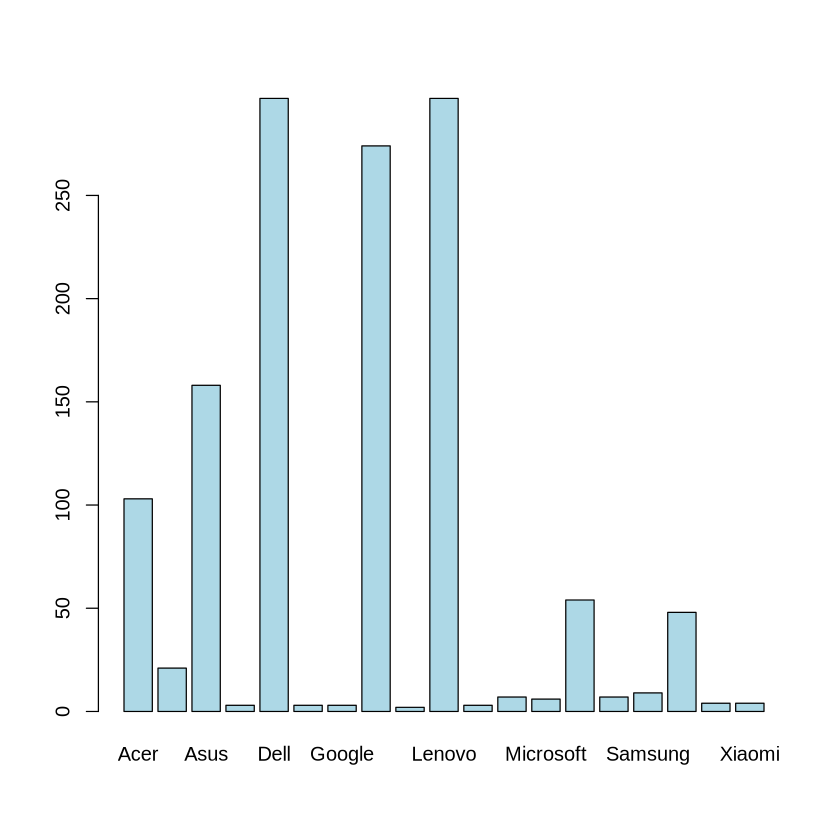

In [14]:
barplot(table(df$Company), col="lightblue")

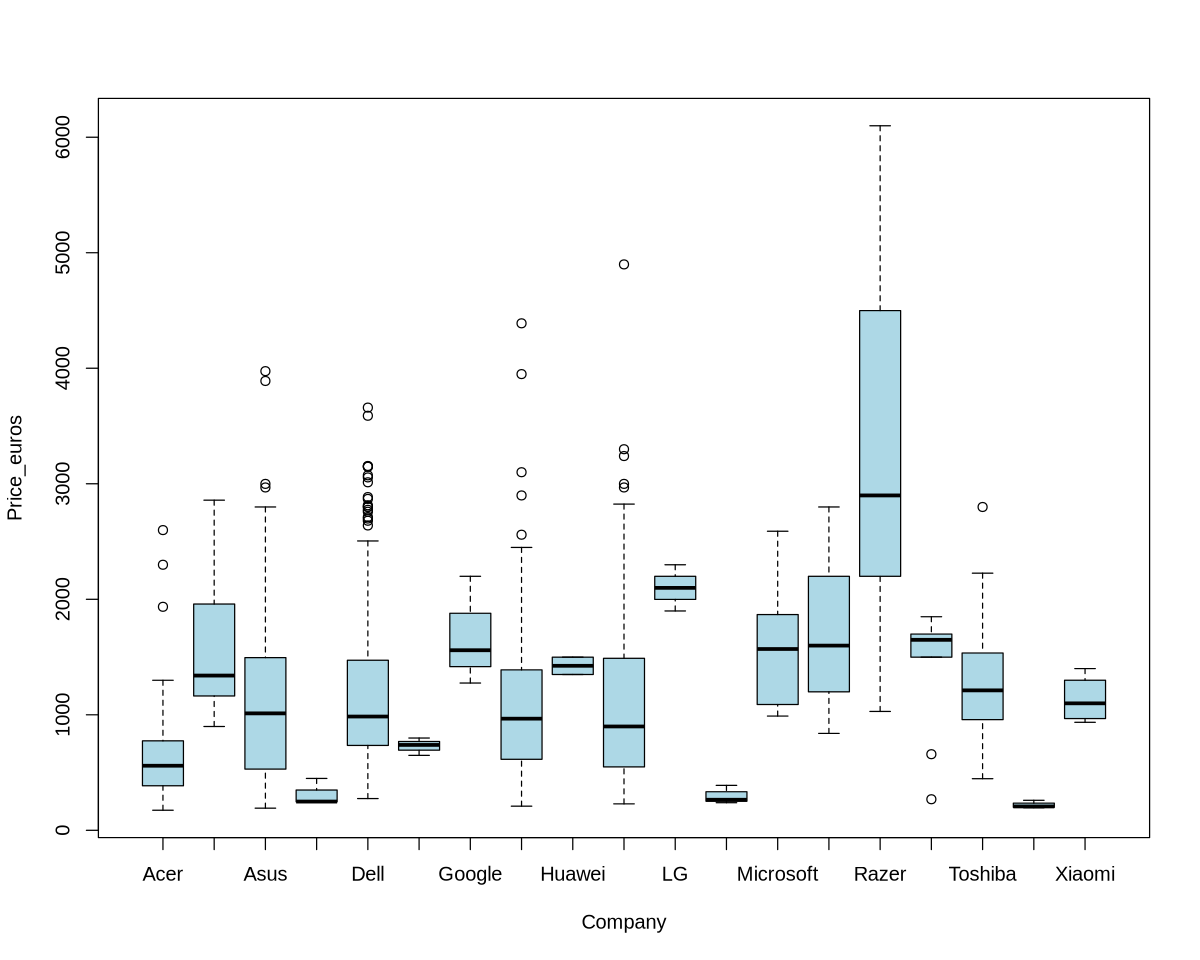

In [15]:
options(repr.plot.width=10, repr.plot.height=8)
boxplot(Price_euros ~ Company, data = df, col="lightblue")

#### Average price per company

In [16]:
mean(df$Price_euros)

[1] 1123.687

In [17]:
aggregate(Price_euros ~ Company, data = df, FUN = mean)

Company,Price_euros
<chr>,<dbl>
Acer,626.7758
Apple,1564.1986
Asus,1104.1694
Chuwi,314.2967
Dell,1186.0690
Fujitsu,729.0000
Google,1677.6667
HP,1067.7749
Huawei,1424.0000


#### Feature: Product

In [18]:
length(unique(df$Product))

[1] 618

In [19]:
head(table(df$Product))


  110-15ACL (A6-7310/4GB/500GB/W10)      14-am079na (N3710/8GB/2TB/W10) 
                                  1                                   1 
15-AC110nv (i7-6500U/6GB/1TB/Radeon      15-AY023na (N3710/8GB/2TB/W10) 
                                  3                                   1 
15-ay047nv (i3-6006U/6GB/1TB/Radeon  15-BA015wm (E2-7110/4GB/500GB/W10) 
                                  1                                   1 

#### Feature: TypeName

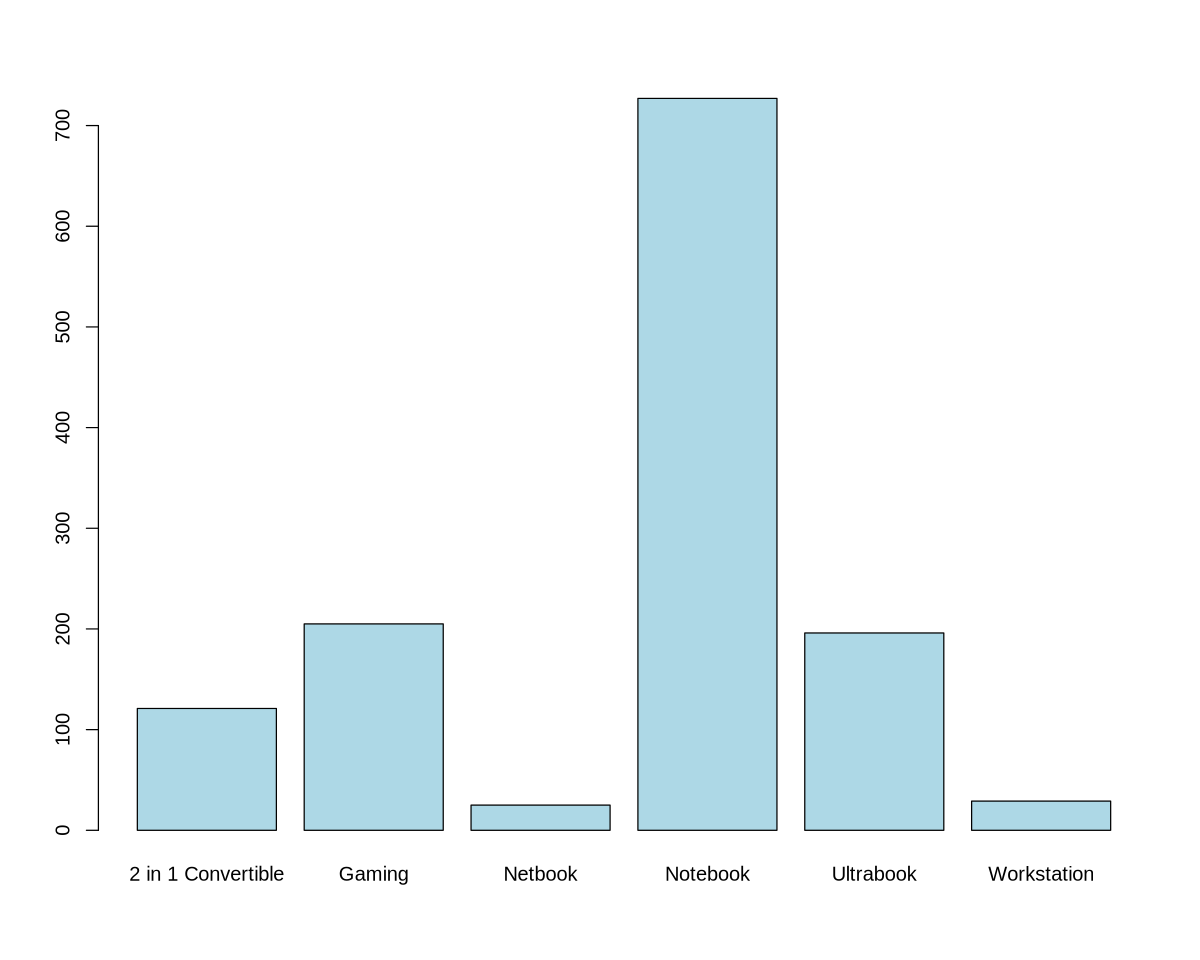

In [20]:
barplot(table(df$TypeName), col="lightblue")

In [21]:
head(table(df$TypeName))


2 in 1 Convertible             Gaming            Netbook           Notebook 
               121                205                 25                727 
         Ultrabook        Workstation 
               196                 29 

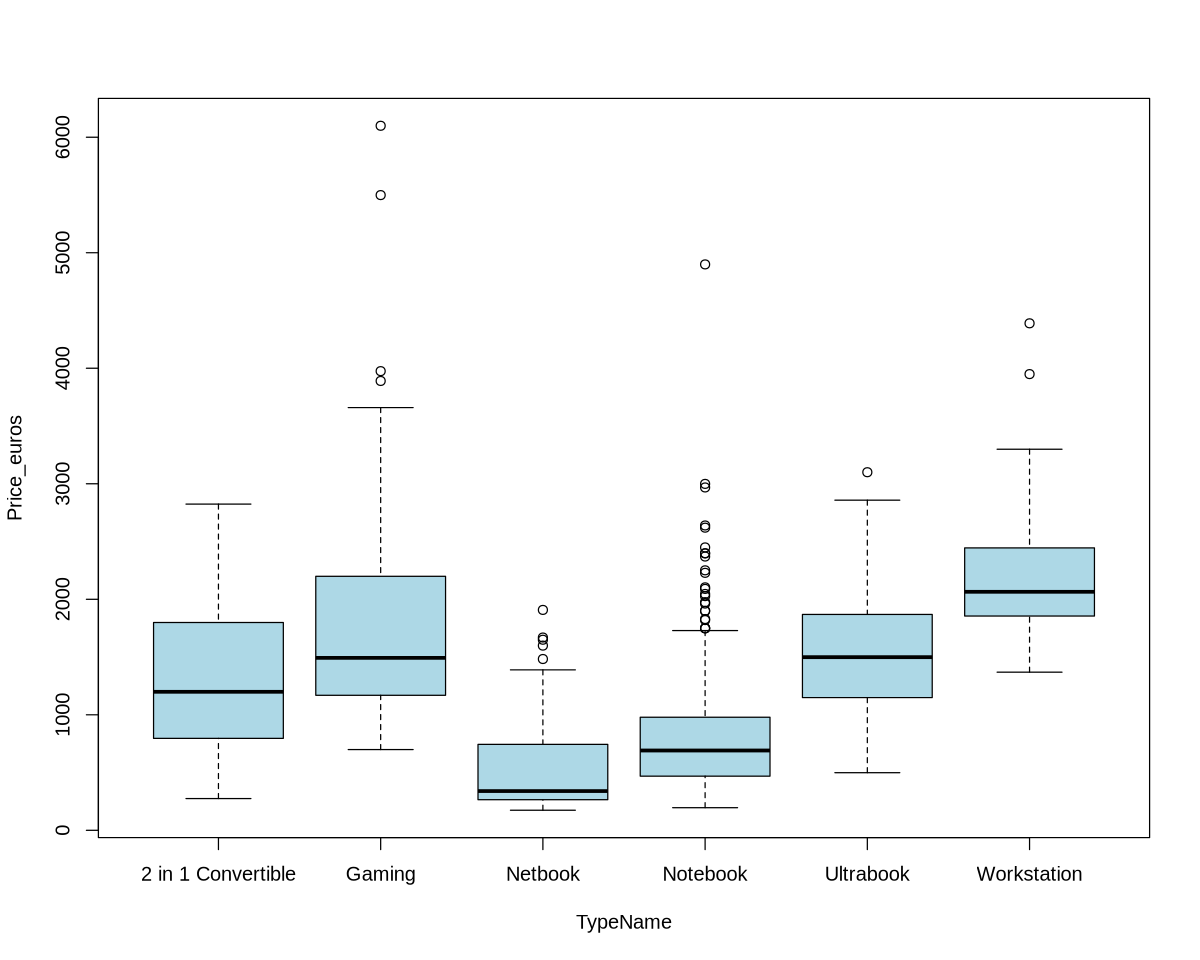

In [22]:
options(repr.plot.width=10, repr.plot.height=8)
boxplot(Price_euros ~ TypeName, data = df, col="lightblue")

#### Feature: Inches

In [23]:
summary(df$Inches)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.10   14.00   15.60   15.02   15.60   18.40 

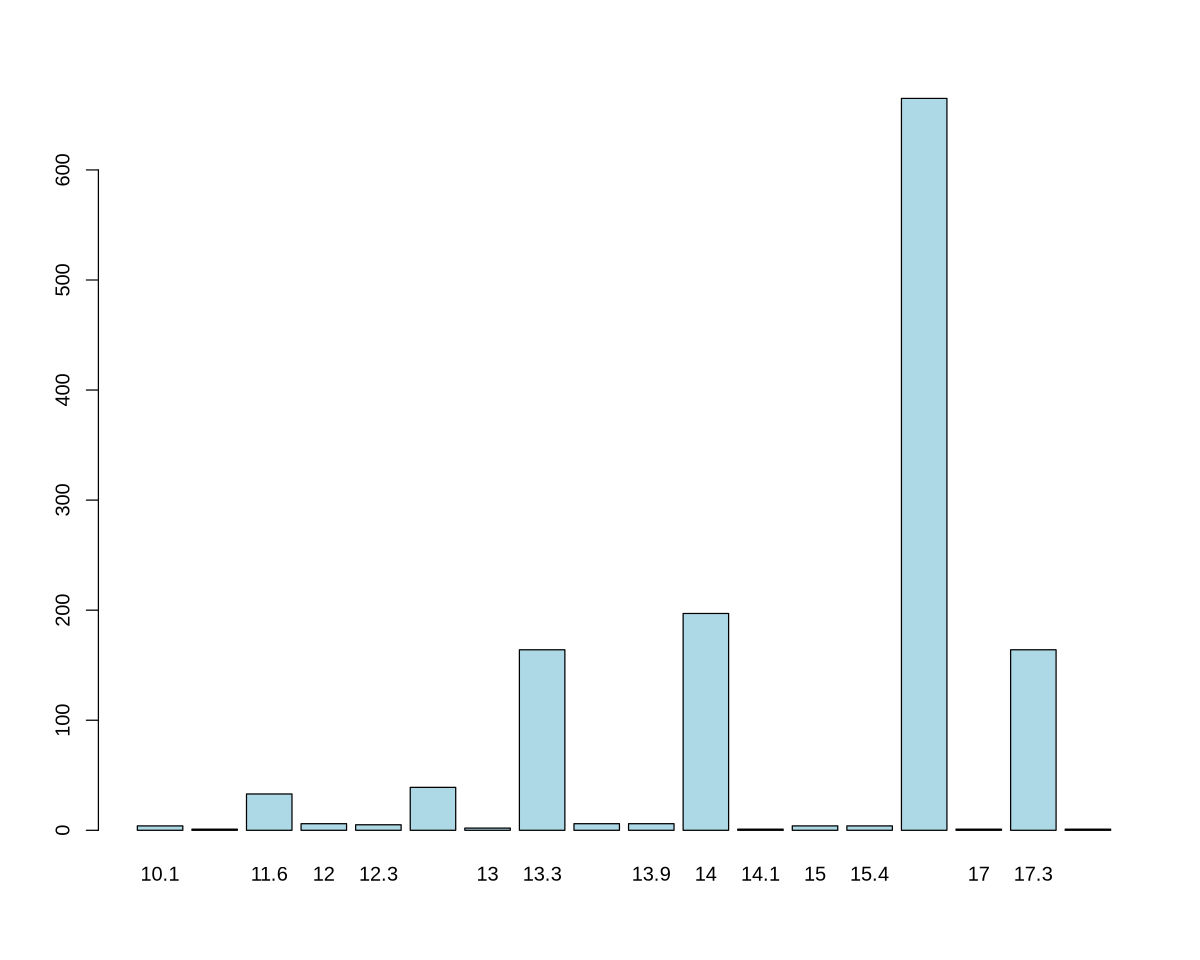

In [24]:
barplot(table(df$Inches), col="lightblue")

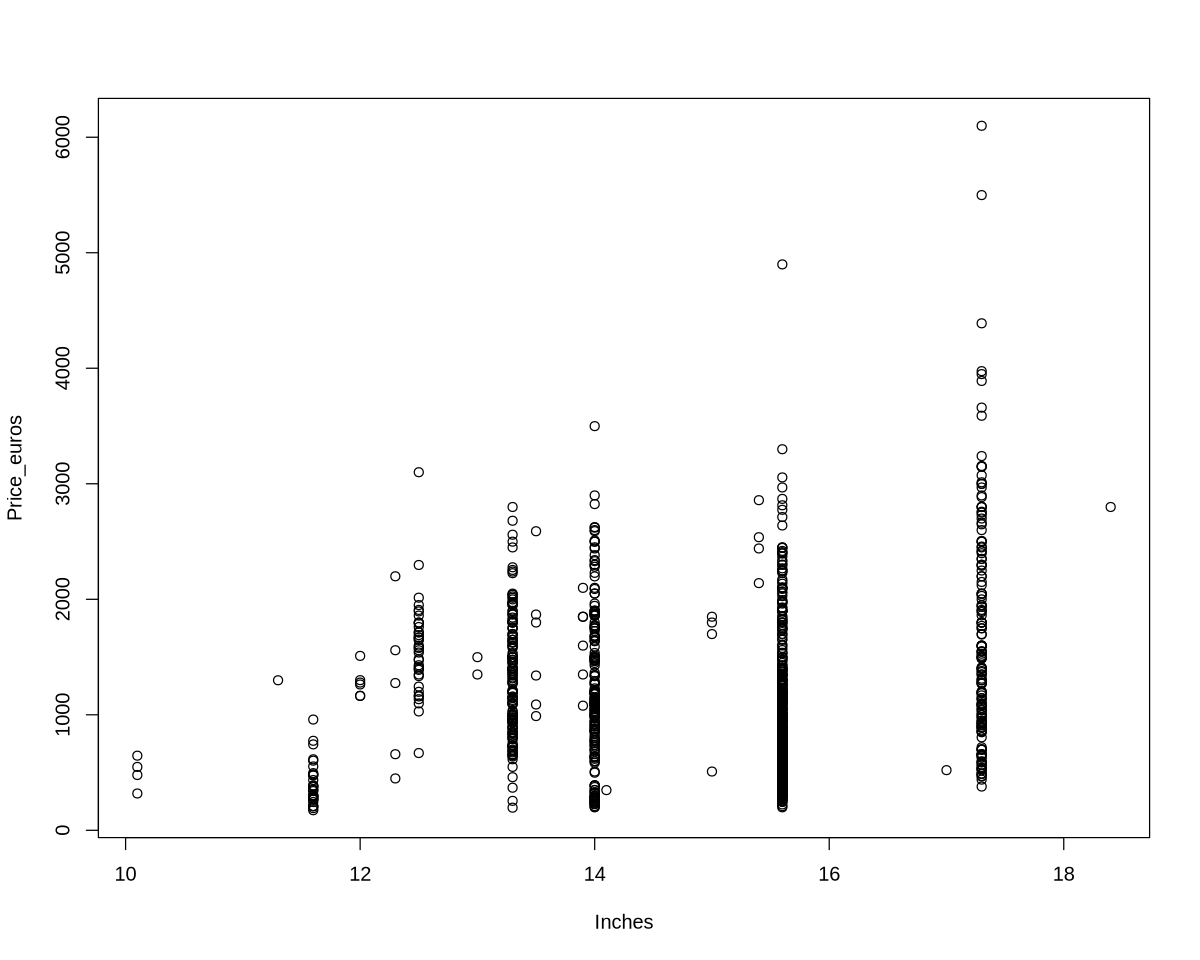

In [25]:
options(repr.plot.width=10, repr.plot.height=8)
plot(Price_euros ~ Inches, data = df, col="black")

In [26]:
#options(repr.plot.width=10, repr.plot.height=8)
#plot(Price_euros ~ Inches, data = df, col=df$TypeName)

#### Feature: ScreenResolution

In [27]:
length(unique(df$ScreenResolution))

[1] 40

In [28]:
table(df$ScreenResolution)


                                     1366x768 
                                          281 
                                     1440x900 
                                            4 
                                     1600x900 
                                           23 
                                    1920x1080 
                                            3 
                                    2560x1440 
                                            3 
          4K Ultra HD / Touchscreen 3840x2160 
                                           10 
                        4K Ultra HD 3840x2160 
                                            7 
              Full HD / Touchscreen 1920x1080 
                                           47 
                            Full HD 1920x1080 
                                          507 
                           IPS Panel 1366x768 
                                            7 
                          IPS Panel 2560x1440 
            

#### Feature: Ram

In [29]:
length(unique(df$Ram))

[1] 9

In [30]:
unique(df$Ram)

[1] "8GB"  "16GB" "4GB"  "2GB"  "12GB" "6GB"  "32GB" "24GB" "64GB"

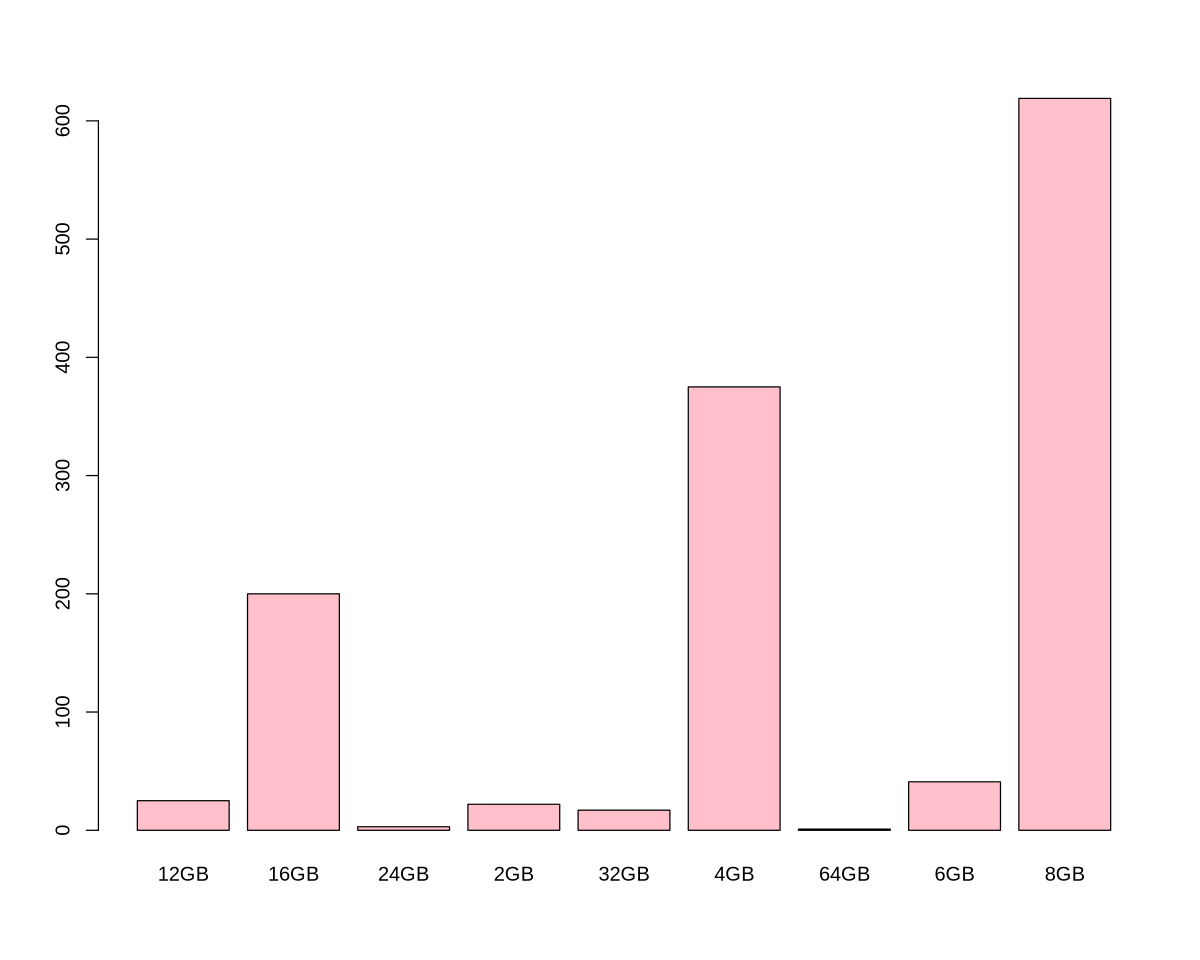

In [31]:
barplot(table(df$Ram), col="pink")

#### Feature: Cpu

In [32]:
length(unique(df$Cpu))

[1] 118

In [33]:
head(df$Cpu)

[1] "Intel Core i5 2.3GHz"       "Intel Core i5 1.8GHz"      
[3] "Intel Core i5 7200U 2.5GHz" "Intel Core i7 2.7GHz"      
[5] "Intel Core i5 3.1GHz"       "AMD A9-Series 9420 3GHz"

#### Feature: OpSys

In [34]:
unique(df$OpSys)

[1] "macOS"        "No OS"        "Windows 10"   "Mac OS X"     "Linux"       
[6] "Android"      "Windows 10 S" "Chrome OS"    "Windows 7"

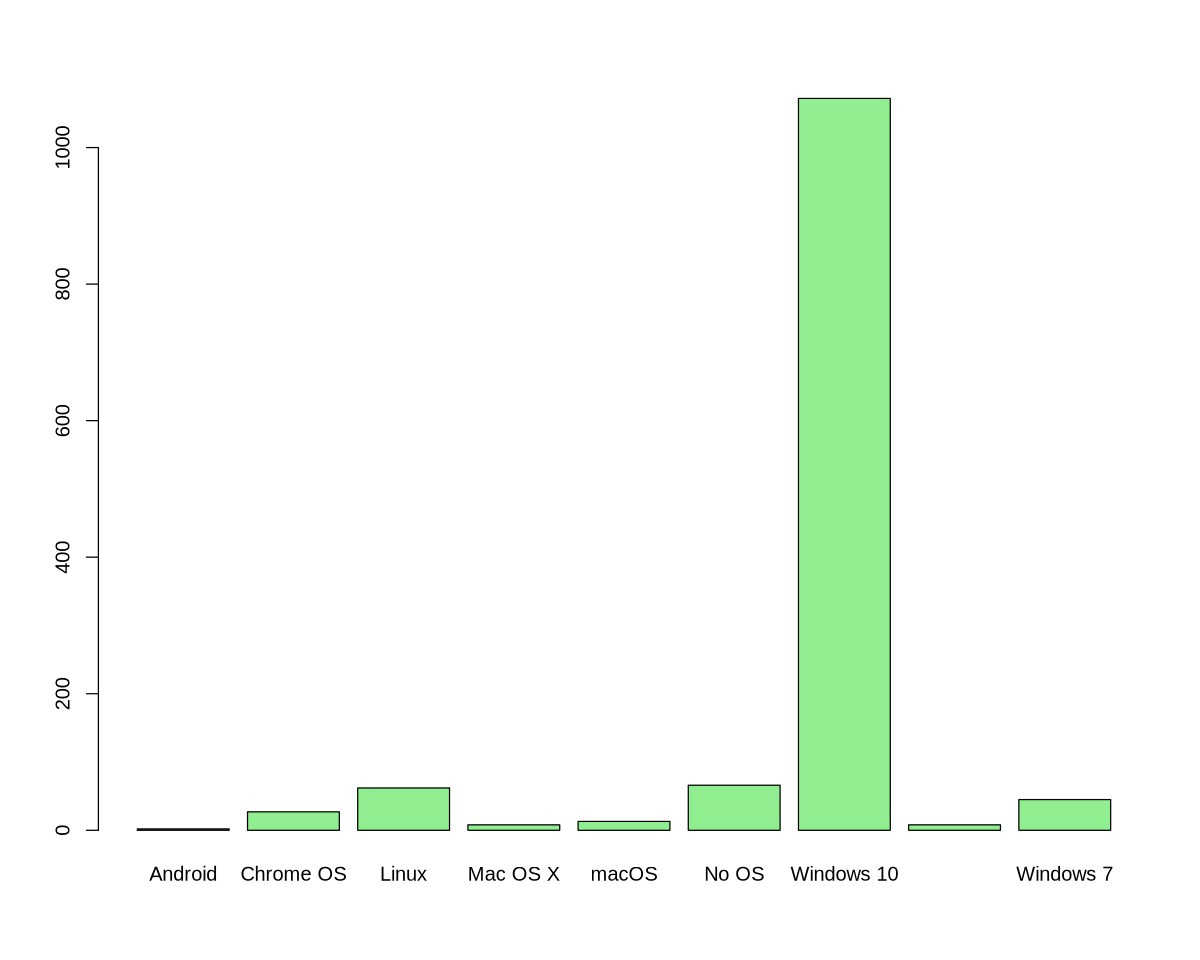

In [35]:
barplot(table(df$OpSys), col="lightgreen")

In [36]:
table(df$OpSys)


     Android    Chrome OS        Linux     Mac OS X        macOS        No OS 
           2           27           62            8           13           66 
  Windows 10 Windows 10 S    Windows 7 
        1072            8           45 

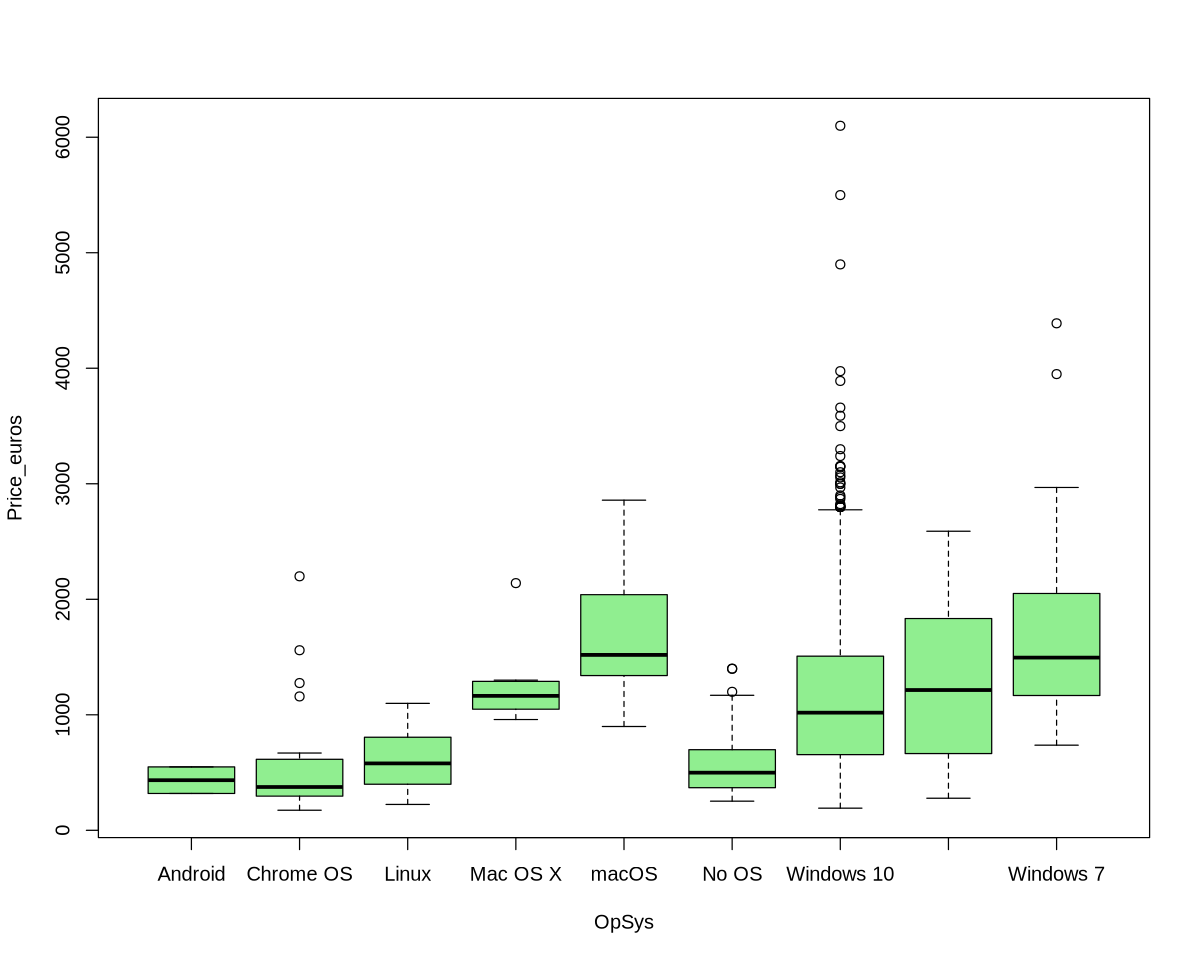

In [37]:
options(repr.plot.width=10, repr.plot.height=8)
boxplot(Price_euros ~ OpSys, data = df, col="lightgreen")

#### Feature: Weight

In [38]:
length(unique(df$Weight))

[1] 179

In [39]:
summary(df$Weight)

   Length     Class      Mode 
     1303 character character 

In [40]:
head(df$Weight)

[1] "1.37kg" "1.34kg" "1.86kg" "1.83kg" "1.37kg" "2.1kg"

#### Feature: Price_euros

In [41]:
summary(df$Price_euros)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    174     599     977    1124    1488    6099 

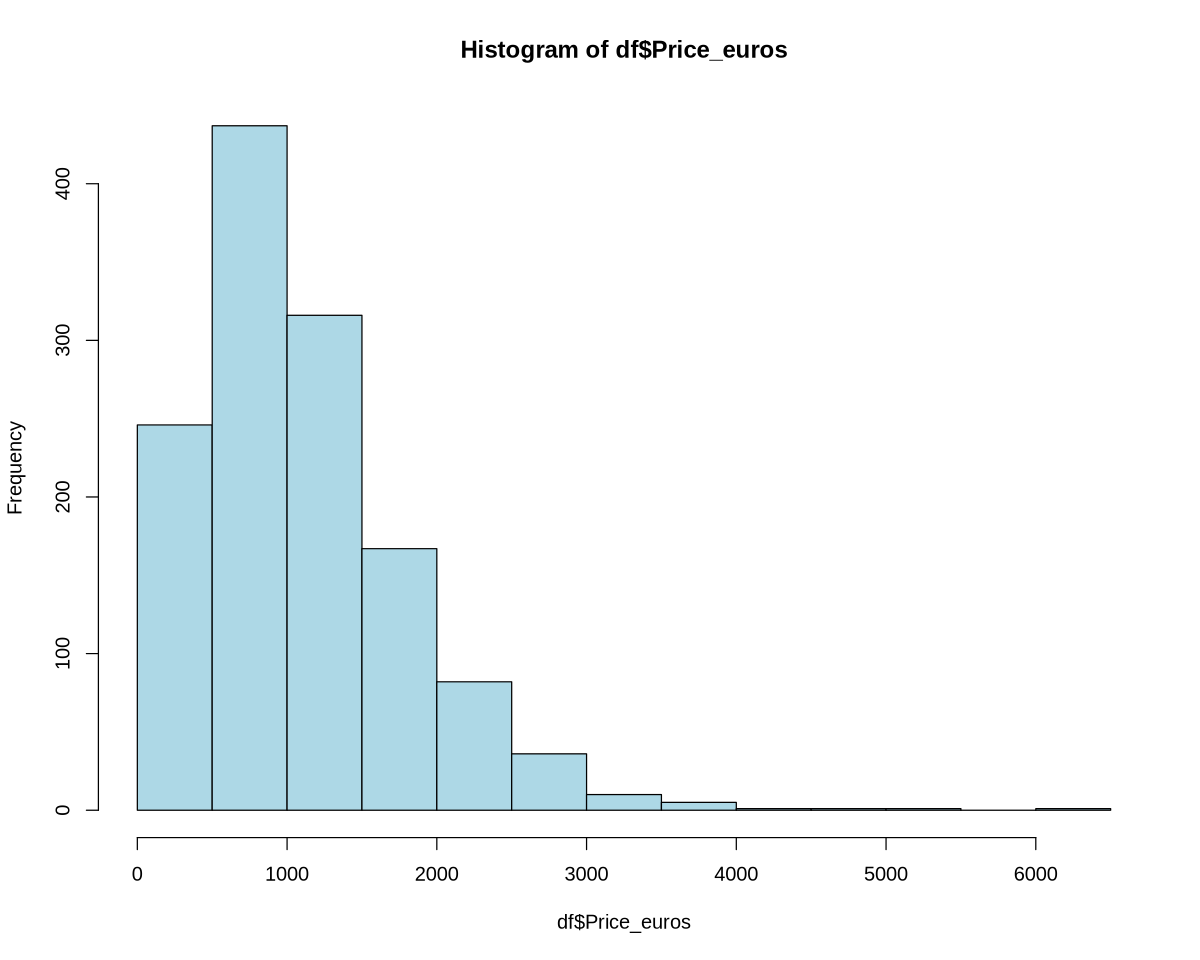

In [42]:
hist(df$Price_euros, col="lightblue")

#### Saving csv

In [45]:
write.csv(df, file = "../input/laptop_price_explored.csv", row.names=FALSE)